In [1]:
import numpy as np
from scipy.stats import beta, t, norm
from scipy.special import btdtri
import matplotlib.pyplot as plt

In [2]:
p = 0.61
n = 10

prior_a = 6
prior_b = 10

success = np.random.binomial(p=p, n=n)
failure = n - success
print("success = %i, failure = %i"%(success, failure))

success = 7, failure = 3


In [3]:
a = prior_a + success
b = prior_b + failure
rv = beta(a, b)

b_up = btdtri(a, b, 0.975)
b_lo = btdtri(a, b, 0.025)

print("95%% credible interval: [%.3f, %.3f]"%(b_lo, b_up))

95% credible interval: [0.313, 0.687]


In [4]:
p_hat = success / n
se = np.sqrt(p_hat * (1 - p_hat) / n)

f_up = p_hat + 1.96 * se
f_lo = p_hat - 1.96 * se

print("95%% confidence interval: [%.3f, %.3f]"%(f_lo, f_up))

95% confidence interval: [0.416, 0.984]


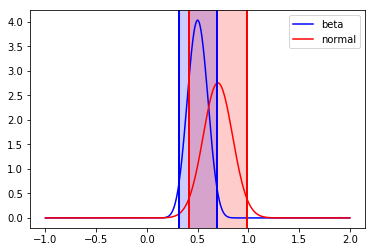

In [5]:
x = np.linspace(-1, 2, 1000)

fig, ax = plt.subplots()

ax.plot(x, rv.pdf(x), color='blue')
ax.plot(x, norm.pdf(x, loc=p_hat, scale=se), color='r')

# bayesian credible interval
right_line = ax.axvline(b_up, lw=2, color='blue')
left_line = ax.axvline(b_lo, lw=2, color='blue')
fill = ax.axvspan(b_lo, b_up, alpha=0.2, color='blue')

# frequentist confidence interval
right_line = ax.axvline(f_up, lw=2, color='r')
left_line = ax.axvline(f_lo, lw=2, color='r')
fill = ax.axvspan(f_lo, f_up, alpha=0.2, color='r')

ax.legend(["beta", "normal"])